In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# switch the renderer to use black and white mode and increase the font size for legends
IPythonConsole.drawOptions.useBWAtomPalette()
IPythonConsole.drawOptions.legendFontSize=24

import lwreg

import rdkit
print(rdkit.__version__)

2024.09.6


In [2]:
# The RDKit standardizer is quite verbose by default, make it be quiet:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.info')

When working with an existing database, the best practice is to retrieve the configuration information from the database itself:

In [3]:
config = lwreg.utils.configure_from_database(dbname='jupyter_demo.sqlt')
config

{'dbname': 'jupyter_demo.sqlt',
 'dbtype': 'sqlite3',
 'standardization': 'fragment',
 'removeHs': 1,
 'useTautomerHashv2': 0,
 'registerConformers': 0,
 'numConformerDigits': 3,
 'lwregSchema': ''}

In [4]:
# tell lwreg to use ths configuration as the default in all other commands
# we call in this session:
lwreg.set_default_config(config)

## Do some queries:

Here's our query molecule:

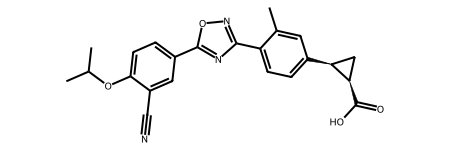

In [15]:
smi = 'CC(C)Oc1ccc(cc1C#N)c2onc(n2)c3ccc(cc3C)[C@H]4C[C@H]4C(=O)O'
Chem.MolFromSmiles(smi)

The default behavior of the `query()` function is to return exact matches:

In [16]:
lwreg.query(smiles=smi)

[132]

But we can also use the `NO_STEREO_SMILES` layer to see if there are any stereoisomers of this molecule in the system:

In [18]:
mrns = lwreg.query(smiles=smi,
           layers = lwreg.utils.HashLayer.NO_STEREO_SMILES)
mrns

[132, 133]

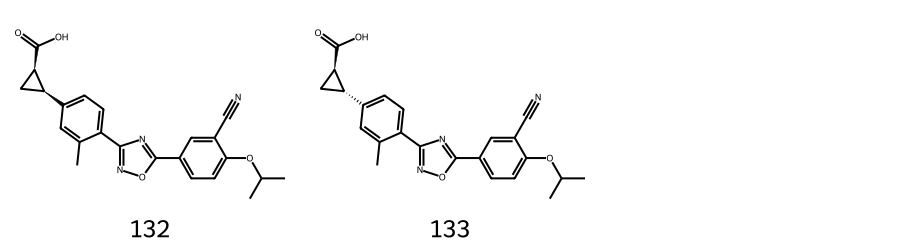

In [19]:
res = lwreg.retrieve(ids=mrns)
res_mols = [Chem.MolFromMolBlock(mb) for _,(mb,fmt) in res.items()]
mrns = [str(mrn) for mrn,_ in res.items()]
Draw.MolsToGridImage(res_mols, legends=mrns, subImgSize=(300,250))

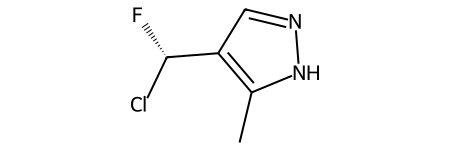

In [24]:
smi = 'Cc1[nH]ncc1[C@@H](F)Cl'
Chem.MolFromSmiles(smi)

In [25]:
mrns = lwreg.query(smiles=smi)
mrns

[2]

In [26]:
mrns = lwreg.query(smiles=smi,
           layers = lwreg.utils.HashLayer.TAUTOMER_HASH)
mrns

[2, 4]

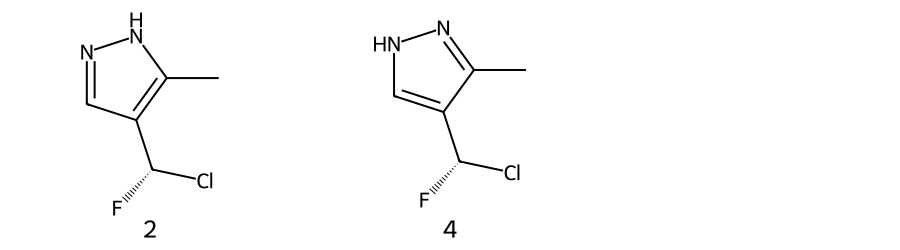

In [27]:
res = lwreg.retrieve(ids=mrns)
res_mols = [Chem.MolFromMolBlock(mb) for _,(mb,fmt) in res.items()]
mrns = [str(mrn) for mrn,_ in res.items()]
Draw.MolsToGridImage(res_mols, legends=mrns, subImgSize=(300,250))

In [28]:
mrns = lwreg.query(smiles=smi,
           layers = lwreg.utils.HashLayer.NO_STEREO_TAUTOMER_HASH)
mrns

[1, 2, 3, 4]

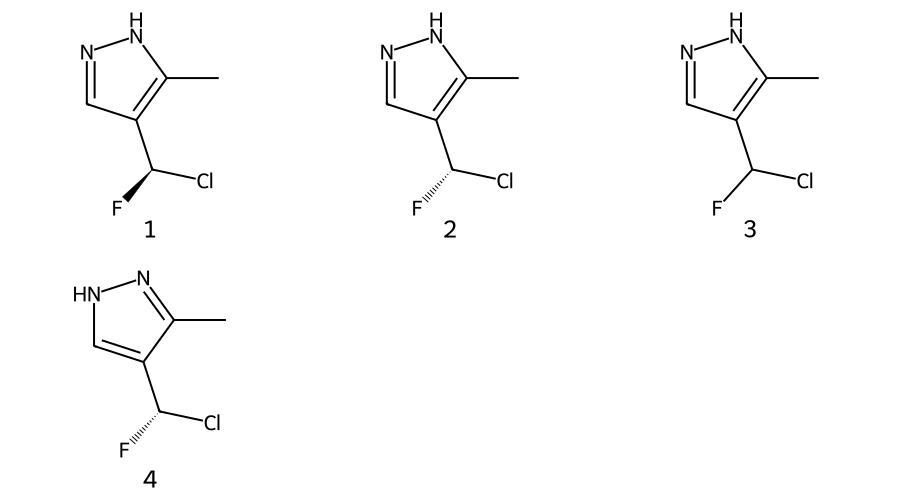

In [29]:
res = lwreg.retrieve(ids=mrns)
res_mols = [Chem.MolFromMolBlock(mb) for _,(mb,fmt) in res.items()]
mrns = [str(mrn) for mrn,_ in res.items()]
Draw.MolsToGridImage(res_mols, legends=mrns, subImgSize=(300,250))

## Retrieving the submitted form of molecules

Let's start by retrieving a single molecule:

In [35]:
res = lwreg.retrieve(id=5)
# check the format of the result:
res[5][1]

'mol'

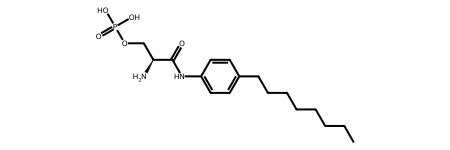

In [36]:
m = Chem.MolFromMolBlock(res[5][0])
m

We can also retrieve the structure submitted for registration, this is the form of the molecule before any standardization was performed:

In [32]:
res = lwreg.retrieve(id=5,as_submitted=True)
# check the format of the result:
res[5][1]

'pkl'

In this case we registered actual RDKit molecules, so they were stored as pkls (binary strings in the RDKit's internal format) in the database.

It's easy to convert this back into a molecule:

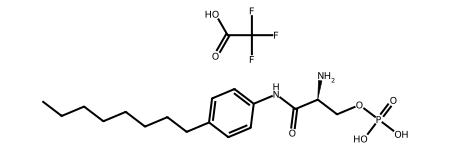

In [34]:
m = Chem.Mol(res[5][0])
m